In [2]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv
from scipy import optimize

## KdVB

In [3]:
def KdVB(u,dx):
    nu = 0.07
    u1 = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0))/2.0/dx
    u2 = (np.roll(u, -2, axis=0) - 2.0*u + np.roll(u, 2, axis=0))/4.0/dx/dx
    u3 = (np.roll(u, -3, axis=0) - 3.0*np.roll(u, -1, axis=0) + 3.0*np.roll(u, 1, axis=0) - np.roll(u, 3, axis=0))/8.0/dx/dx/dx
    F = -u*u1 - 6.0*u3 + nu*u2
    
    return F

In [8]:
def Rungekutta4(ua,h,dx):
    F_ = KdVB(ua,dx)
    K1 = h*F_

    u2 = ua+K1/2.0
    F_ = KdVB(u2,dx)
    K2 = h*F_
    
    u3 = ua+K2/2.0
    F_ = KdVB(u3,dx)
    K3 = h*F_
    
    u4 = ua+K3
    F_ = KdVB(u4,dx)
    K4 = h*F_
    
    ub = ua+K1/6.0+K2/3.0+K3/3.0+K4/6.0
    
    return ub

In [19]:
def init_u(N,dx,t,b1,b2):
    x = np.arange(1,N+1)*dx
    
    k1 = np.sqrt(b1)*(x-2.0*t*b1)/np.sqrt(2.0)    
    k2 = np.sqrt(b2)*(x-2.0*t*b2)/np.sqrt(2.0)
     
    u1 = (1.0/np.cosh(k1))**2
    u2 = (1.0/np.sinh(k2))**2
    u3 = 1.0/np.tanh(k2)
    u4 = np.tanh(k1)
    
    u = -2.0*(b1-b2)*(u1*b1 + u2*b2)/(-np.sqrt(2.0*b2)*u3 + np.sqrt(2.0*b1)*u4)**2
    
    return u

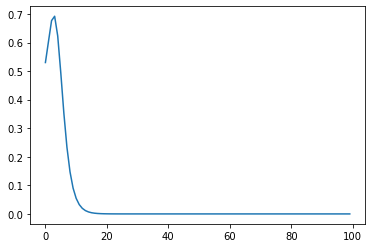

In [23]:
N = 100
dx = 0.5
h = 0.05
t = 0.0
b1 = 0.5
b2 = 1.0
u = init_u(N,dx,t,b1,b2)
plt.plot(u)

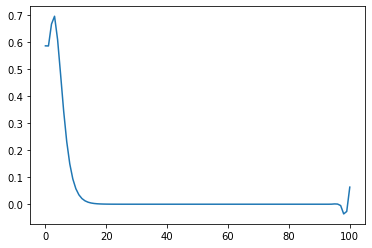

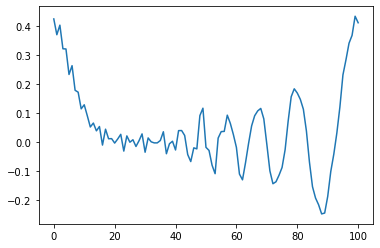

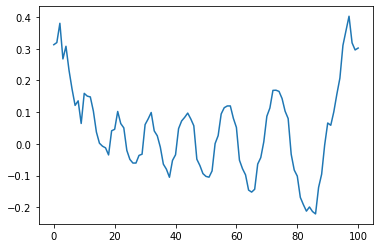

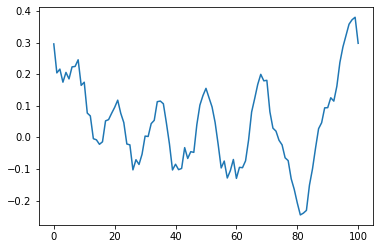

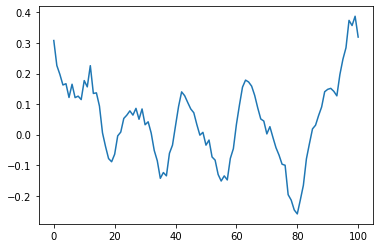

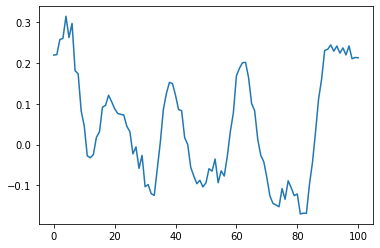

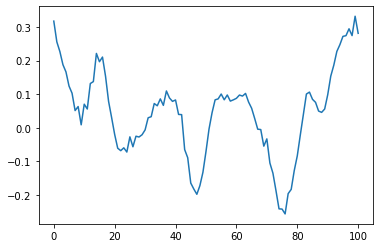

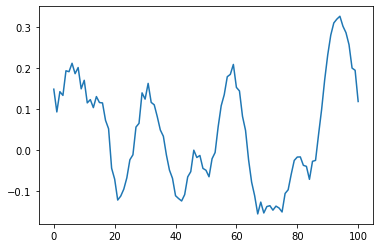

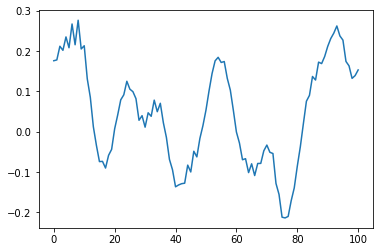

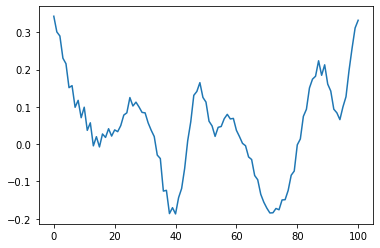

In [24]:
N = 101
dx = 0.5
h = 0.01
t = 0
b1 = 0.5
b2 = 1.0
u = init_u(N,dx,t,b1,b2)
#u = np.arange(N)
#u = np.cos(2.0*np.pi*u/N)
#F = Rungekutta4(u, h, dx)
#print(F-u)
for k in range(1000):
    unew = Rungekutta4(u,h,dx)
    u = unew
    if (k%100==0):
        plt.plot(unew)
        plt.show()

In [34]:
import scipy
x = np.random.rand(5).reshape(-1,1)
A = x@x.T
la,v = np.linalg.eig(A)
I = v.T@v
print(I)

[[ 1.00000000e+00+0.00000000e+00j -3.46944695e-18+0.00000000e+00j
  -1.48157309e-01+7.81745137e-02j -1.48157309e-01-7.81745137e-02j
  -1.11287208e-01+0.00000000e+00j]
 [-3.46944695e-18+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  -5.55111512e-17-1.04083409e-17j -5.55111512e-17+1.04083409e-17j
   2.22044605e-16+0.00000000e+00j]
 [-1.48157309e-01+7.81745137e-02j -5.55111512e-17-1.04083409e-17j
   8.29248201e-01+5.75934925e-02j  1.00000000e+00+0.00000000e+00j
   8.61277058e-02-2.01843303e-02j]
 [-1.48157309e-01-7.81745137e-02j -5.55111512e-17+1.04083409e-17j
   1.00000000e+00+0.00000000e+00j  8.29248201e-01-5.75934925e-02j
   8.61277058e-02+2.01843303e-02j]
 [-1.11287208e-01+0.00000000e+00j  2.22044605e-16+0.00000000e+00j
   8.61277058e-02-2.01843303e-02j  8.61277058e-02+2.01843303e-02j
   1.00000000e+00+0.00000000e+00j]]
